# Today's agenda

1. A bit more about indexes
2. `value_counts`
3. Strings in Pandas and the `str` proxy object
4. Plotting in Pandas
5. DataFrames — creating them, editing them, selecting from them
6. Reading from and writing to files (especially CSV)
7. Plotting data frames
8. Special kinds of plots — scatter plots — on data frames

In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
s.index = [100, 200, 300, 400, 500]
s

100    10
200    20
300    30
400    40
500    50
dtype: int64

In [5]:
s.index

Int64Index([100, 200, 300, 400, 500], dtype='int64')

In [6]:
s.index.values

array([100, 200, 300, 400, 500])

In [7]:
s.index = list('abcde')
s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [8]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [9]:
s.index = pd.RangeIndex(100, 110, 2)

In [10]:
s

100    10
102    20
104    30
106    40
108    50
dtype: int64

In [11]:
s.index

RangeIndex(start=100, stop=110, step=2)

In [12]:
s.loc[104] # use 104 as the index to look up a value

30

In [13]:
s.iloc[4]  # count from the start, to the 4th (starting with 0) item

50

In [14]:
# value_counts

s = Series([10, 20, 30, 20, 30, 40, 30, 40, 40, 40, 50, 60, 70, 50, 70,90])
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [15]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

In [16]:
# what are the three most common values in s?

s.value_counts().head(3)

40    4
30    3
70    2
dtype: int64

In [18]:
s.value_counts().head(3).index.values

array([40, 30, 70])

In [20]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

In [23]:
s.value_counts(normalize=True)

40    0.2500
30    0.1875
70    0.1250
20    0.1250
50    0.1250
60    0.0625
10    0.0625
90    0.0625
dtype: float64

In [24]:
s = Series([10, 20, 30, 40, 50, 60, 70])
s

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64

In [25]:
s = Series([10, 20, 30, 40, 50, 60, 70], dtype=np.int16)
s

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int16

In [26]:
s = Series([10, 20, 30, 40.2, 50, 60, 70])
s

0    10.0
1    20.0
2    30.0
3    40.2
4    50.0
5    60.0
6    70.0
dtype: float64

In [27]:
a = np.array('this is a very interesting demo'.split())
a

array(['this', 'is', 'a', 'very', 'interesting', 'demo'], dtype='<U11')

In [28]:
s = Series('this is a very interesting demo'.split())
s


0           this
1             is
2              a
3           very
4    interesting
5           demo
dtype: object

In [29]:
len(s)

6

In [30]:
for one_item in s:
    print(f'{one_item}: {len(one_item)}')

this: 4
is: 2
a: 1
very: 4
interesting: 11
demo: 4


In [31]:
# the .str proxy on a series lets us apply a string method to every string in the series

s.str

In [32]:
s.str.len()

0     4
1     2
2     1
3     4
4    11
5     4
dtype: int64

In [33]:
s = Series('10 20 30 abcd 50 60 70'.split())
s

0      10
1      20
2      30
3    abcd
4      50
5      60
6      70
dtype: object

In [34]:
s.astype(np.int64)

ValueError: invalid literal for int() with base 10: 'abcd'

In [35]:
# I want to get the mean of the numbers in series s
s

0      10
1      20
2      30
3    abcd
4      50
5      60
6      70
dtype: object

In [36]:
s.sum()

'102030abcd506070'

In [37]:
s.str.isdigit()

0     True
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [38]:
s[s.str.isdigit()]

0    10
1    20
2    30
4    50
5    60
6    70
dtype: object

In [39]:
s[s.str.isdigit()].astype(np.int64)

0    10
1    20
2    30
4    50
5    60
6    70
dtype: int64

# Exercises: Pandas and strings

1. Create a series containing 10 words of varying lengths.
2. Find the words whose length is odd.
3. Find the words whose length is shorter than the mean.
4. Find the words (if any) that contain both 'a' and 'e'.  (Hint: Use the "contains" method)

In [40]:
s = Series('this is a fantastic demonstration of a few interesting words'.split())
s

0             this
1               is
2                a
3        fantastic
4    demonstration
5               of
6                a
7              few
8      interesting
9            words
dtype: object

In [44]:
s[s.str.len() % 2 == 1]

2                a
3        fantastic
4    demonstration
6                a
7              few
8      interesting
9            words
dtype: object

In [47]:
s[s.str.len() < s.str.len().mean()]

0     this
1       is
2        a
5       of
6        a
7      few
9    words
dtype: object

In [50]:
s[s.str.contains('a')  & s.str.contains('e')]

4    demonstration
dtype: object

In [51]:
# regular expressions

# https://RegexpCrashCourse.com/  

In [53]:
s[s.str.contains('a.*e|e.*a')]

4    demonstration
dtype: object

In [54]:
help(s.str.contains)

Help on method contains in module pandas.core.strings:

contains(pat, case=True, flags=0, na=nan, regex=True) method of pandas.core.strings.StringMethods instance
    Test if pattern or regex is contained within a string of a Series or Index.
    
    Return boolean Series or Index based on whether a given pattern or regex is
    contained within a string of a Series or Index.
    
    Parameters
    ----------
    pat : str
        Character sequence or regular expression.
    case : bool, default True
        If True, case sensitive.
    flags : int, default 0 (no flags)
        Flags to pass through to the re module, e.g. re.IGNORECASE.
    na : default NaN
        Fill value for missing values.
    regex : bool, default True
        If True, assumes the pat is a regular expression.
    
        If False, treats the pat as a literal string.
    
    Returns
    -------
    Series or Index of boolean values
        A Series or Index of boolean values indicating whether the
        gi

In [55]:
s = Series([10, 20, 30, 20, 30, 40, 50, 30, 10])

s

0    10
1    20
2    30
3    20
4    30
5    40
6    50
7    30
8    10
dtype: int64

<AxesSubplot:>

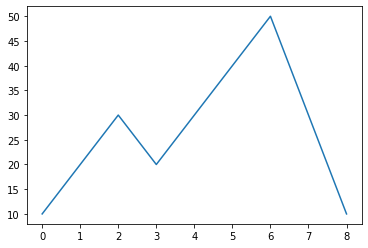

In [56]:
s.plot()  # line plot -- we could also say s.plot.line()

<AxesSubplot:>

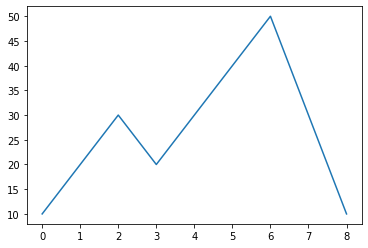

In [57]:
s.plot.line()

<AxesSubplot:>

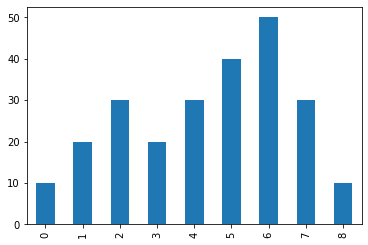

In [59]:
s.plot.bar()

In [60]:
s = Series(np.random.randint(0, 100, 1000))
s

0      36
1      64
2      48
3      99
4       7
       ..
995     9
996    95
997    13
998    72
999    21
Length: 1000, dtype: int64

<AxesSubplot:>

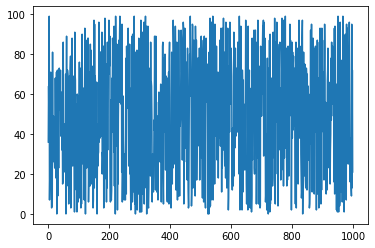

In [61]:
s.plot.line()

<AxesSubplot:>

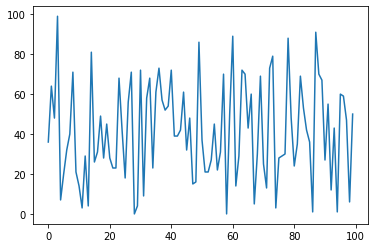

In [62]:
s[:100].plot.line()

In [63]:
s.value_counts()

86    17
73    17
81    16
3     16
5     16
      ..
24     5
85     5
26     4
16     3
62     2
Length: 100, dtype: int64

<AxesSubplot:ylabel='Frequency'>

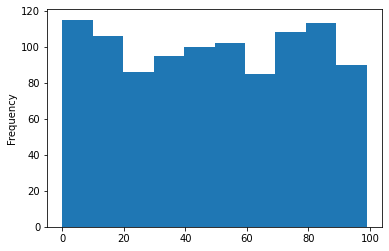

In [64]:
# histogram -- shows us how often each value appeared

s.plot.hist()

<AxesSubplot:>

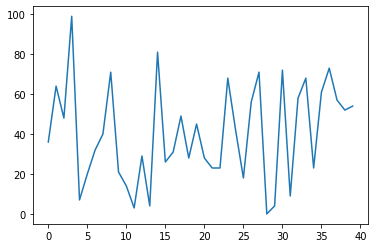

In [66]:
s = s[:40]
s.plot.line()

<AxesSubplot:title={'center':'My Amazing Plot'}>

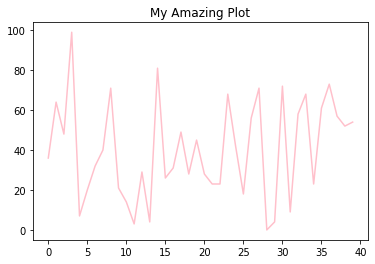

In [68]:
s.plot.line(color='pink', title='My Amazing Plot')

In [69]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x=None, y=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.
    
    This function is useful to plot lines using DataFrame's values
    as coordinates.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array_like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by name, RGB or RGBA code,
            for instance 'red' or '#a98d19'.
    
        - A sequence of color strings referred to by name, RGB or RGBA
            code, which will be used for each column recursively. For
     

In [70]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

In [71]:
s.describe()

count    40.000000
mean     40.200000
std      24.976091
min       0.000000
25%      22.500000
50%      38.000000
75%      58.750000
max      99.000000
dtype: float64

<AxesSubplot:>

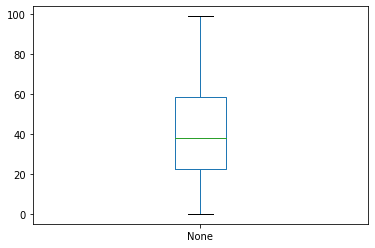

In [72]:
# descriptive statistics -- John Tewkey

# box plot -- visual version of the descriptive statistics

s.plot.box()

In [76]:
s.loc[0] = 600
s.loc[1] = 500
s.loc[2] = 400
s.loc[3] = 300


<AxesSubplot:>

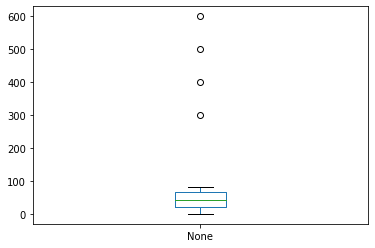

In [77]:
s.plot.box()

In [79]:
s.mean() + 2*s.std()

343.44016985846724

In [80]:
help(s.plot.box)

Help on method box in module pandas.plotting._core:

box(by=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Make a box plot of the DataFrame columns.
    
    A box plot is a method for graphically depicting groups of numerical
    data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. The position of the whiskers
    is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the
    box. Outlier points are those past the end of the whiskers.
    
    For further details see Wikipedia's
    entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`__.
    
    A consideration when using this chart is that the box and the whiskers
    can overlap, which is very common when plotting small sets of data.
    
    Parameters
    ----------
    by : str or sequence
        Column in the DataFrame to group by

<AxesSubplot:>

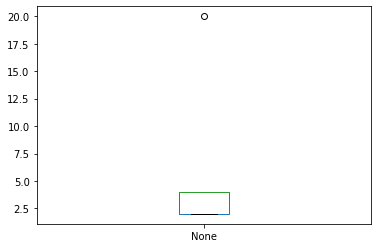

In [81]:
s = Series([2, 4, 2, 4, 2, 4, 20])
s.plot.box()

In [82]:
s.describe()

count     7.000000
mean      5.428571
std       6.502747
min       2.000000
25%       2.000000
50%       4.000000
75%       4.000000
max      20.000000
dtype: float64

In [83]:
s = 

0     2
1     4
2     2
3     4
4     2
5     4
6    20
dtype: int64

In [84]:
# value_counts

s = Series([10, 20, 30, 20, 30, 40, 30, 40, 40, 40, 50, 60, 70, 50, 70,90])
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [85]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

<AxesSubplot:ylabel='None'>

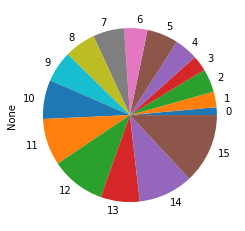

In [86]:
s.plot.pie()  # create a pie plot from our series

In [87]:
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [88]:
s.sum()

690

<AxesSubplot:ylabel='None'>

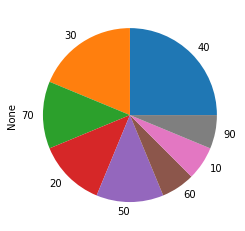

In [89]:
s.value_counts().plot.pie()

In [91]:
help(s.plot.pie)

Help on method pie in module pandas.plotting._core:

pie(**kwargs) method of pandas.plotting._core.PlotAccessor instance
    Generate a pie plot.
    
    A pie plot is a proportional representation of the numerical data in a
    column. This function wraps :meth:`matplotlib.pyplot.pie` for the
    specified column. If no column reference is passed and
    ``subplots=True`` a pie plot is drawn for each numerical column
    independently.
    
    Parameters
    ----------
    y : int or label, optional
        Label or position of the column to plot.
        If not provided, ``subplots=True`` argument must be passed.
    **kwargs
        Keyword arguments to pass on to :meth:`DataFrame.plot`.
    
    Returns
    -------
    matplotlib.axes.Axes or np.ndarray of them
        A NumPy array is returned when `subplots` is True.
    
    See Also
    --------
    Series.plot.pie : Generate a pie plot for a Series.
    DataFrame.plot : Make plots of a DataFrame.
    
    Examples
    ------

# Exercises: Plotting

1. Get the weather report for your city over the coming week, and create a series with those temperatures.  The index should contain the days' names.

2. Create a line plot with the temperatures.

3. Create a pie plot, showing how often each temperature is forecast in the coming week. 

4. Create a box plot with the temperatures.  What are the maximum, minimum, and mean temperatures?


In [92]:
s = Series([32, 31, 31, 31, 30, 31, 33, 32],
          index='Tue Wed Thu Fri Sat Sun Mon Tue'.split())
s



Tue    32
Wed    31
Thu    31
Fri    31
Sat    30
Sun    31
Mon    33
Tue    32
dtype: int64

In [93]:
s.loc['Tue']

Tue    32
Tue    32
dtype: int64

<AxesSubplot:>

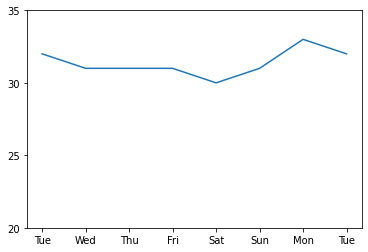

In [104]:
s.plot.line(yticks=list(range(20, 40, 5)))

In [96]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

In [105]:
s.value_counts()

31    4
32    2
30    1
33    1
dtype: int64

<AxesSubplot:ylabel='None'>

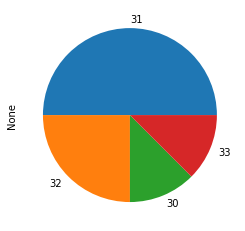

In [106]:
s.value_counts().plot.pie()

<AxesSubplot:>

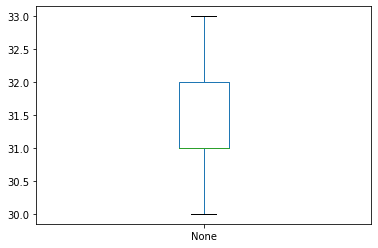

In [107]:
s.plot.box()

In [108]:
s.describe()

count     8.000000
mean     31.375000
std       0.916125
min      30.000000
25%      31.000000
50%      31.000000
75%      32.000000
max      33.000000
dtype: float64

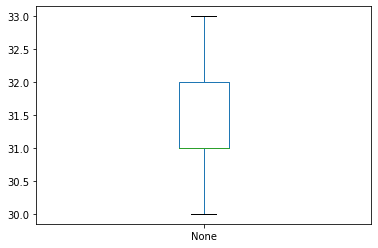

In [109]:
plot = s.plot.box()   # store the boxplot object to the "plot" variable


In [110]:
plot

<AxesSubplot:>

In [111]:
type(plot)

matplotlib.axes._subplots.AxesSubplot

In [112]:
# now that I have the plot object, I can get the image ("figure")
fig = plot.get_figure()

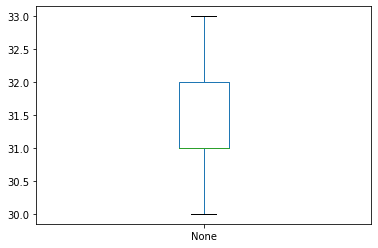

In [113]:
fig

In [114]:
# store the figure to the filesystem with "savefig"
fig.savefig('myplot.png')

In [115]:
%pwd

'/Users/reuven/Consulting/Courses/Data Science/cisco-2020-september'

In [116]:
!ls

'Cisco — 2020 September 21.ipynb'   Untitled.ipynb   myplot.png
'Cisco — 2020 September 22.ipynb'   files


In [117]:
fig.savefig('myplot.jpg')

In [118]:
!file myplot*

myplot.jpg: JPEG image data, JFIF standard 1.01, resolution (DPI), density 72x72, segment length 16, baseline, precision 8, 432x288, components 3
myplot.png: PNG image data, 432 x 288, 8-bit/color RGBA, non-interlaced


In [119]:
df = DataFrame([[10, 20, 30, 40],
                [50, 60, 70, 80],
                [90, 100, 110, 120]])

df

,0,1,2,3
0,10,20,30,40
1,50,60,70,80
2,90,100,110,120


In [120]:
df.values  # get the NumPy array behind the scenes of our data frame

array([[ 10,  20,  30,  40],
       [ 50,  60,  70,  80],
       [ 90, 100, 110, 120]])

In [121]:
df = DataFrame(np.random.randint(0, 100, [4,5]))
df

,0,1,2,3,4
0,8,39,82,10,73
1,45,2,66,49,10
2,94,13,62,3,12
3,38,4,97,60,15


In [122]:
# the index continues to contain the labels for our rows (just like with a Series)
# the column names are defined similarly, with "columns="

df = DataFrame(np.random.randint(0, 100, [4,5]),
              index=list('abcd'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,90,84,51,69,69
b,39,68,99,75,43
c,74,41,72,71,99
d,60,36,37,70,76


In [123]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [124]:
df.columns

Index(['v', 'w', 'x', 'y', 'z'], dtype='object')

In [125]:
# to retrieve a row, use .loc or .iloc with the index or position

df.loc['a']

v    90
w    84
x    51
y    69
z    69
Name: a, dtype: int64

In [126]:
df.loc[['b', 'd']]

,v,w,x,y,z
b,39,68,99,75,43
d,60,36,37,70,76


In [128]:
df

,v,w,x,y,z
a,90,84,51,69,69
b,39,68,99,75,43
c,74,41,72,71,99
d,60,36,37,70,76


In [129]:
# to retrieve columns, just use [] and the column name

df['x']  # this is the column x

a    51
b    99
c    72
d    37
Name: x, dtype: int64

In [130]:
df[['x', 'z']]

,x,z
a,51,69
b,99,43
c,72,99
d,37,76


In [132]:
# get the odd values from column 'x'

df['x'][df['x'] % 2 == 1]

a    51
b    99
d    37
Name: x, dtype: int64

In [133]:
df

,v,w,x,y,z
a,90,84,51,69,69
b,39,68,99,75,43
c,74,41,72,71,99
d,60,36,37,70,76


In [134]:
df['b':'d'] # this retrieves the ROWS 'b' through 'd'

,v,w,x,y,z
b,39,68,99,75,43
c,74,41,72,71,99
d,60,36,37,70,76


In [135]:
df

,v,w,x,y,z
a,90,84,51,69,69
b,39,68,99,75,43
c,74,41,72,71,99
d,60,36,37,70,76


In [136]:
df.loc['c'].loc['y']  # PLEASE -- NEVER DO THIS!!!

71

In [137]:
df.loc['c', 'y']

71

In [138]:
df.loc['c', 'y'] = 9999


In [139]:
df

,v,w,x,y,z
a,90,84,51,69,69
b,39,68,99,75,43
c,74,41,72,9999,99
d,60,36,37,70,76


In [140]:
df.loc['c', 'y'] = 9999.0

In [141]:
df

,v,w,x,y,z
a,90,84,51,69.0,69
b,39,68,99,75.0,43
c,74,41,72,9999.0,99
d,60,36,37,70.0,76


In [142]:
df['y'].mean()

2553.25

In [143]:
df['y'].min()

69.0

In [144]:
df['y']

a      69.0
b      75.0
c    9999.0
d      70.0
Name: y, dtype: float64

In [145]:
df['y'].dtype

dtype('float64')

In [148]:
df.dtypes  # this returns a series, the values are strings (or objects)

v      int64
w      int64
x      int64
y    float64
z      int64
dtype: object

In [149]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('int64')], dtype=object)

# Exercises: Data frames

1. Create a 5x5 data frame in which the rows are "abcde" and the
    columns are "vwxyz", and the values are random integers from
    0-1,000.

2. Retrieve row 'b'

3. Retrieve rows 'b' and 'd'

4. Retrieve rows 'b', 'c', and 'd'

5. Retrieve column 'w'

6. Retrieve columns 'w' and 'y'

7. Retrieve columns 'w', 'x', and 'y'

8. Retrieve the item at row e, column v

9. Update the item at row e, column z to be 123.456

10. Create a data frame with two columns: 'age' and 'shoesize'.  Each
    row will represent a different person in your family.  And indeed,
    create the data frame such that the indexes are the names of your
    family members, and the "age" and "shoesize" columns are the right
    values. 

11. What is the average age in your family?  What is the average shoe size?


In [150]:
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,133,199,305,757,379
b,383,876,931,323,615
c,48,4,465,782,466
d,130,651,532,57,275
e,648,261,181,107,267


In [151]:
df.loc['b']

v    383
w    876
x    931
y    323
z    615
Name: b, dtype: int64

In [152]:
df.loc[['b', 'd']]

,v,w,x,y,z
b,383,876,931,323,615
d,130,651,532,57,275


In [153]:
df.loc[['b', 'c', 'd']]

,v,w,x,y,z
b,383,876,931,323,615
c,48,4,465,782,466
d,130,651,532,57,275


In [154]:
df.loc['b':'d']  # slice here is up to and including 'd'

,v,w,x,y,z
b,383,876,931,323,615
c,48,4,465,782,466
d,130,651,532,57,275


In [155]:
df.iloc[1:4]  # numeric slices are up to and NOT including 4

,v,w,x,y,z
b,383,876,931,323,615
c,48,4,465,782,466
d,130,651,532,57,275


In [156]:
df.iloc[1:4:2]

,v,w,x,y,z
b,383,876,931,323,615
d,130,651,532,57,275


In [157]:
df['w']

a    199
b    876
c      4
d    651
e    261
Name: w, dtype: int64

In [158]:
df.w

a    199
b    876
c      4
d    651
e    261
Name: w, dtype: int64

In [159]:
df[['w', 'y']]

,w,y
a,199,757
b,876,323
c,4,782
d,651,57
e,261,107


In [160]:
df[['w', 'x', 'y']]

,w,x,y
a,199,305,757
b,876,931,323
c,4,465,782
d,651,532,57
e,261,181,107


9. Update the item at row e, column z to be 123.456

In [161]:
df.loc['e', 'z'] = 123.456

df

,v,w,x,y,z
a,133,199,305,757,379.000
b,383,876,931,323,615.000
c,48,4,465,782,466.000
d,130,651,532,57,275.000
e,648,261,181,107,123.456


In [163]:
df['z']['e'] = 987.654

<ipython-input-163-36d306131912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z']['e'] = 987.654


In [164]:
df

,v,w,x,y,z
a,133,199,305,757,379.000
b,383,876,931,323,615.000
c,48,4,465,782,466.000
d,130,651,532,57,275.000
e,648,261,181,107,987.654


10. Create a data frame with two columns: 'age' and 'shoesize'.  Each
    row will represent a different person in your family.  And indeed,
    create the data frame such that the indexes are the names of your
    family members, and the "age" and "shoesize" columns are the right
    values. 

In [166]:
df = DataFrame([[50, 46],
                [20, 40],
                [18, 40],
                [15, 44]],
              index='Reuven Atara Shikma Amotz'.split(),
              columns='age shoesize'.split())
df

,age,shoesize
Reuven,50,46
Atara,20,40
Shikma,18,40
Amotz,15,44


11. What is the average age in your family?  What is the average shoe size?

In [167]:
df['age'].mean()

25.75

In [168]:
df['shoesize'].mean()

42.5

In [169]:
df.mean()

age         25.75
shoesize    42.50
dtype: float64

In [170]:
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,692,463,144,332,253
b,800,12,836,197,527
c,780,987,617,9,114
d,18,223,970,792,243
e,730,523,427,157,847


In [171]:
df['y']

a    332
b    197
c      9
d    792
e    157
Name: y, dtype: int64

In [173]:
df['y'][df['y'] % 2 == 0]

a    332
d    792
Name: y, dtype: int64

In [174]:
# apply the boolean series to the entire data frame

# what we get is: the rows of df where y is even

df[df['y'] % 2 == 0]

,v,w,x,y,z
a,692,463,144,332,253
d,18,223,970,792,243


In [175]:
# we could also say: Show me the values of v and x where y is even
df[['v', 'x']][df['y'] % 2 == 0]

,v,x
a,692,144
d,18,970


In [176]:
df

,v,w,x,y,z
a,692,463,144,332,253
b,800,12,836,197,527
c,780,987,617,9,114
d,18,223,970,792,243
e,730,523,427,157,847


In [177]:
# where is every single value in df even?
df % 2 == 0

,v,w,x,y,z
a,True,False,True,True,False
b,True,True,True,False,False
c,True,False,False,False,True
d,True,False,True,True,False
e,True,False,False,False,False


In [178]:
# you can apply the boolean data frame to a data frame!

# where the boolean is True, we get the original value
# where it is False, we get NaN

df[df%2==0]

,v,w,x,y,z
a,692,NaN,144.0,332.0,NaN
b,800,12.0,836.0,NaN,NaN
c,780,NaN,NaN,NaN,114.0
d,18,NaN,970.0,792.0,NaN
e,730,NaN,NaN,NaN,NaN


In [180]:
# what is the mean of each column's even values?

df[df%2==0].mean()

v    604.0
w     12.0
x    650.0
y    562.0
z    114.0
dtype: float64

In [183]:
# get a boolean data frame, showing where the values in a column are > that column's mean

df[df > df.mean()]

,v,w,x,y,z
a,692.0,463.0,NaN,332.0,NaN
b,800.0,NaN,836.0,NaN,527.0
c,780.0,987.0,617.0,NaN,NaN
d,NaN,NaN,970.0,792.0,NaN
e,730.0,523.0,NaN,NaN,847.0


In [184]:
# remember replacena and dropna?

df = df[df>df.mean()]
df

,v,w,x,y,z
a,692.0,463.0,NaN,332.0,NaN
b,800.0,NaN,836.0,NaN,527.0
c,780.0,987.0,617.0,NaN,NaN
d,NaN,NaN,970.0,792.0,NaN
e,730.0,523.0,NaN,NaN,847.0


In [185]:
df.dropna()   # remove any row with even 1 NaN in it

,v,w,x,y,z


In [187]:
df.dropna(thresh=3)    # at least 3 non-NaN values are enough to keep a row

,v,w,x,y,z
a,692.0,463.0,NaN,332.0,NaN
b,800.0,NaN,836.0,NaN,527.0
c,780.0,987.0,617.0,NaN,NaN
e,730.0,523.0,NaN,NaN,847.0


In [188]:
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, dro

In [189]:
df

,v,w,x,y,z
a,692.0,463.0,NaN,332.0,NaN
b,800.0,NaN,836.0,NaN,527.0
c,780.0,987.0,617.0,NaN,NaN
d,NaN,NaN,970.0,792.0,NaN
e,730.0,523.0,NaN,NaN,847.0


In [191]:
df.fillna(df.mean())  # replaces NaN values with that column's mean!

,v,w,x,y,z
a,692.0,463.000000,807.666667,332.0,687.0
b,800.0,657.666667,836.000000,562.0,527.0
c,780.0,987.000000,617.000000,562.0,687.0
d,750.5,657.666667,970.000000,792.0,687.0
e,730.0,523.000000,807.666667,562.0,847.0


In [192]:
df

,v,w,x,y,z
a,692.0,463.0,NaN,332.0,NaN
b,800.0,NaN,836.0,NaN,527.0
c,780.0,987.0,617.0,NaN,NaN
d,NaN,NaN,970.0,792.0,NaN
e,730.0,523.0,NaN,NaN,847.0


In [193]:
# adding a column: just assign!

df['w'] = [10, 20, 30, 40, 50]
df

,v,w,x,y,z
a,692.0,10,NaN,332.0,NaN
b,800.0,20,836.0,NaN,527.0
c,780.0,30,617.0,NaN,NaN
d,NaN,40,970.0,792.0,NaN
e,730.0,50,NaN,NaN,847.0


In [194]:
df['u'] = [100, 200, 300, 400, 500]
df

,v,w,x,y,z,u
a,692.0,10,NaN,332.0,NaN,100
b,800.0,20,836.0,NaN,527.0,200
c,780.0,30,617.0,NaN,NaN,300
d,NaN,40,970.0,792.0,NaN,400
e,730.0,50,NaN,NaN,847.0,500


In [195]:
df.dtypes

v    float64
w      int64
x    float64
y    float64
z    float64
u      int64
dtype: object

In [196]:
# adding a row is almost as easy: assign to .loc

df.loc['f'] = [2,4,6,8,10,12]
df

,v,w,x,y,z,u
a,692.0,10,NaN,332.0,NaN,100
b,800.0,20,836.0,NaN,527.0,200
c,780.0,30,617.0,NaN,NaN,300
d,NaN,40,970.0,792.0,NaN,400
e,730.0,50,NaN,NaN,847.0,500
f,2.0,4,6.0,8.0,10.0,12


In [197]:
df['t'] = df['u'] * 6
df

,v,w,x,y,z,u,t
a,692.0,10,NaN,332.0,NaN,100,600
b,800.0,20,836.0,NaN,527.0,200,1200
c,780.0,30,617.0,NaN,NaN,300,1800
d,NaN,40,970.0,792.0,NaN,400,2400
e,730.0,50,NaN,NaN,847.0,500,3000
f,2.0,4,6.0,8.0,10.0,12,72


In [198]:
df

,v,w,x,y,z,u,t
a,692.0,10,NaN,332.0,NaN,100,600
b,800.0,20,836.0,NaN,527.0,200,1200
c,780.0,30,617.0,NaN,NaN,300,1800
d,NaN,40,970.0,792.0,NaN,400,2400
e,730.0,50,NaN,NaN,847.0,500,3000
f,2.0,4,6.0,8.0,10.0,12,72


In [199]:
df.drop('f')  # return a new data frame in which 'f' is missing

,v,w,x,y,z,u,t
a,692.0,10,NaN,332.0,NaN,100,600
b,800.0,20,836.0,NaN,527.0,200,1200
c,780.0,30,617.0,NaN,NaN,300,1800
d,NaN,40,970.0,792.0,NaN,400,2400
e,730.0,50,NaN,NaN,847.0,500,3000


In [200]:
df.drop('f', axis='rows')  # less ambiguity! are you removing a row or a column?

,v,w,x,y,z,u,t
a,692.0,10,NaN,332.0,NaN,100,600
b,800.0,20,836.0,NaN,527.0,200,1200
c,780.0,30,617.0,NaN,NaN,300,1800
d,NaN,40,970.0,792.0,NaN,400,2400
e,730.0,50,NaN,NaN,847.0,500,3000


In [201]:
# to remove a column, you must specify that it's a column via the "axis" parameter
df.drop('t', axis='columns')

,v,w,x,y,z,u
a,692.0,10,NaN,332.0,NaN,100
b,800.0,20,836.0,NaN,527.0,200
c,780.0,30,617.0,NaN,NaN,300
d,NaN,40,970.0,792.0,NaN,400
e,730.0,50,NaN,NaN,847.0,500
f,2.0,4,6.0,8.0,10.0,12


In [202]:
df.drop(['e', 'f'], axis='rows')

,v,w,x,y,z,u,t
a,692.0,10,NaN,332.0,NaN,100,600
b,800.0,20,836.0,NaN,527.0,200,1200
c,780.0,30,617.0,NaN,NaN,300,1800
d,NaN,40,970.0,792.0,NaN,400,2400


In [203]:
df.drop(['w', 'y', 'u'], axis='columns')

,v,x,z,t
a,692.0,NaN,NaN,600
b,800.0,836.0,527.0,1200
c,780.0,617.0,NaN,1800
d,NaN,970.0,NaN,2400
e,730.0,NaN,847.0,3000
f,2.0,6.0,10.0,72


# Exercises: Data frames

1. Create a 5x5 data frame with index "abcde" and columns "vwxyz",
    and random integers from 0-1,000.

2. Which elements of column "w" are both even and greater than its mean?

3. Which elements of columns "v" and "x" correspond to the elements you found in (2)?

4. Replace the item at index "d" and column "y" with the mean of column "y".

5. Replace all items < mean (of each column) with NaN.

6. Replace NaN values with 0.

7. Replace 0 with the std of each column.



In [204]:
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))
df

,v,w,x,y,z
a,989,9,980,879,330
b,116,871,15,153,469
c,979,794,631,14,27
d,865,714,686,912,252
e,444,471,333,594,27


In [205]:
df['w'] % 2 == 0

a    False
b    False
c     True
d     True
e    False
Name: w, dtype: bool

In [207]:
df['w'] > df['w'].mean()

a    False
b     True
c     True
d     True
e    False
Name: w, dtype: bool

In [209]:
df['w'][(df['w'] % 2 == 0) & 
        (df['w'] > df['w'].mean())]

c    794
d    714
Name: w, dtype: int64

In [210]:
df[['v', 'x']][(df['w'] % 2 == 0) & 
               (df['w'] > df['w'].mean())]

,v,x
c,979,631
d,865,686


4. Replace the item at index "d" and column "y" with the mean of column "y".

In [212]:
df.loc['d', 'y'] = df['y'].mean()
df

,v,w,x,y,z
a,989,9,980,879.0,330
b,116,871,15,153.0,469
c,979,794,631,14.0,27
d,865,714,686,510.4,252
e,444,471,333,594.0,27


5. Replace all items < mean (of each column) with NaN.

In [217]:
df[df < df.mean()] = NaN
df

,v,w,x,y,z
a,989.0,NaN,980.0,879.0,330.0
b,NaN,871.0,NaN,NaN,469.0
c,979.0,794.0,631.0,NaN,NaN
d,865.0,714.0,686.0,510.4,252.0
e,NaN,NaN,NaN,594.0,NaN


6. Replace NaN values with 0.

In [219]:
df = df.fillna(0)
df

,v,w,x,y,z
a,989.0,0.0,980.0,879.0,330.0
b,0.0,871.0,0.0,0.0,469.0
c,979.0,794.0,631.0,0.0,0.0
d,865.0,714.0,686.0,510.4,252.0
e,0.0,0.0,0.0,594.0,0.0


7. Replace 0 with the std of each column.

In [220]:
df.std()

v    519.521222
w    437.876923
x    439.862251
y    387.043295
z    207.029467
dtype: float64

In [233]:
df[df==99999] = 0

In [238]:
df[df==0] = NaN
df

,v,w,x,y,z
a,989.0,NaN,980.0,879.0,330.0
b,NaN,871.0,NaN,NaN,469.0
c,979.0,794.0,631.0,NaN,NaN
d,865.0,714.0,686.0,510.4,252.0
e,NaN,NaN,NaN,594.0,NaN


In [240]:
df = df.fillna(df.std())
df

,v,w,x,y,z
a,989.00000,78.504777,980.000000,879.000000,330.000000
b,68.88638,871.000000,187.644167,193.252822,469.000000
c,979.00000,794.000000,631.000000,193.252822,109.919668
d,865.00000,714.000000,686.000000,510.400000,252.000000
e,68.88638,78.504777,187.644167,594.000000,109.919668




(8) Create a data frame containing five rows.  Each row describes a
    product.  The index will be the name of the product.  One column
    will be the price of each product.  Another column will be the
    quantity sold.

(9) Which product had the greatest number of sales?

(10) Which product had the greatest value of sales?

(11) How much did we make, total?

(12) Due to a tax change, we now need to increase the price of each
    item by 10%.  Change the prices to reflect this.  As a result, we
    expect sales to decline by 10%.  Change the quantity bought to reflect
    this.  How much will the store make now?  How does this compare with
    what you found in (11)?


In [243]:
df = DataFrame([['book', 30, 100],
               ['sandwich', 10, 200],
               ['tea', 5, 150],
               ['cake', 8, 80],
               ['water', 4, 300]],
              columns='product price quantity_sold'.split())

df

,product,price,quantity_sold
0,book,30,100
1,sandwich,10,200
2,tea,5,150
3,cake,8,80
4,water,4,300


In [244]:
df.set_index('product')  # returns a new data frame with product as the index
df

,product,price,quantity_sold
0,book,30,100
1,sandwich,10,200
2,tea,5,150
3,cake,8,80
4,water,4,300


In [245]:
df = df.set_index('product')
df

,price,quantity_sold
product,,
book,30,100
sandwich,10,200
tea,5,150
cake,8,80
water,4,300


In [248]:
df.reset_index()  # returns a new data frame without product as an index

,product,price,quantity_sold
0,book,30,100
1,sandwich,10,200
2,tea,5,150
3,cake,8,80
4,water,4,300


In [249]:
df

,price,quantity_sold
product,,
book,30,100
sandwich,10,200
tea,5,150
cake,8,80
water,4,300


In [253]:
# which product sold the greatest number?

df[df['quantity_sold'] == df['quantity_sold'].max()]

,price,quantity_sold
product,,
water,4,300


In [254]:
# which product brought in the most revenue?

df['revenue'] = df['price'] * df['quantity_sold']
df

,price,quantity_sold,revenue
product,,,
book,30,100,3000
sandwich,10,200,2000
tea,5,150,750
cake,8,80,640
water,4,300,1200


In [256]:
df[df['revenue'] == df['revenue'].max()]

,price,quantity_sold,revenue
product,,,
book,30,100,3000


In [257]:
df

,price,quantity_sold,revenue
product,,,
book,30,100,3000
sandwich,10,200,2000
tea,5,150,750
cake,8,80,640
water,4,300,1200


In [258]:
df['revenue'].sum()

7590


(12) Due to a tax change, we now need to increase the price of each
    item by 10%.  Change the prices to reflect this.  As a result, we
    expect sales to decline by 10%.  Change the quantity bought to reflect
    this.  How much will the store make now?  How does this compare with
    what you found in (11)?


In [259]:
df['new_price'] = df['price'] * 1.1
df['new_quantity_sold'] = df['quantity_sold'] * 0.9
df['new_revenue'] = df['new_price'] * df['new_quantity_sold']
df

,price,quantity_sold,revenue,new_price,new_quantity_sold,new_revenue
product,,,,,,
book,30,100,3000,33.0,90.0,2970.0
sandwich,10,200,2000,11.0,180.0,1980.0
tea,5,150,750,5.5,135.0,742.5
cake,8,80,640,8.8,72.0,633.6
water,4,300,1200,4.4,270.0,1188.0


In [260]:
df['new_revenue'].sum()

7514.1

In [261]:
df

,price,quantity_sold,revenue,new_price,new_quantity_sold,new_revenue
product,,,,,,
book,30,100,3000,33.0,90.0,2970.0
sandwich,10,200,2000,11.0,180.0,1980.0
tea,5,150,750,5.5,135.0,742.5
cake,8,80,640,8.8,72.0,633.6
water,4,300,1200,4.4,270.0,1188.0


In [262]:
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,565,664,818,97,971
b,687,620,913,269,734
c,903,806,959,693,700
d,881,612,927,982,138
e,895,909,66,5,825


In [263]:
# write to the filesystem

df.to_clipboard()

In [264]:
help(df.to_clipboard)

Help on method to_clipboard in module pandas.core.generic:

to_clipboard(excel: bool = True, sep: Union[str, NoneType] = None, **kwargs) -> None method of pandas.core.frame.DataFrame instance
    Copy object to the system clipboard.
    
    Write a text representation of object to the system clipboard.
    This can be pasted into Excel, for example.
    
    Parameters
    ----------
    excel : bool, default True
        Produce output in a csv format for easy pasting into excel.
    
        - True, use the provided separator for csv pasting.
        - False, write a string representation of the object to the clipboard.
    
    sep : str, default ``'\t'``
        Field delimiter.
    **kwargs
        These parameters will be passed to DataFrame.to_csv.
    
    See Also
    --------
    DataFrame.to_csv : Write a DataFrame to a comma-separated values
        (csv) file.
    read_clipboard : Read text from clipboard and pass to read_table.
    
    Notes
    -----
    Requirements f

In [266]:
# if you run this, and get a message saying that a package hasn't been
# installed, then install it -- and then try again

df.to_excel('mydata.xls')

In [267]:
!open mydata.xls


In [268]:
help(df.to_excel)

Help on method to_excel in module pandas.core.generic:

to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None) -> None method of pandas.core.frame.DataFrame instance
    Write object to an Excel sheet.
    
    To write a single object to an Excel .xlsx file it is only necessary to
    specify a target file name. To write to multiple sheets it is necessary to
    create an `ExcelWriter` object with a target file name, and specify a sheet
    in the file to write to.
    
    Multiple sheets may be written to by specifying unique `sheet_name`.
    With all data written to the file it is necessary to save the changes.
    Note that creating an `ExcelWriter` object with a file name that already
    exists will result in the contents of the existing file being erased.
    
    Parameters
    -------

In [270]:
print(df.to_csv())  # comma-separated values

,v,w,x,y,z
a,565,664,818,97,971
b,687,620,913,269,734
c,903,806,959,693,700
d,881,612,927,982,138
e,895,909,66,5,825



In [272]:
df.to_csv('mydata.csv')

In [273]:
!cat mydata.csv

,v,w,x,y,z
a,565,664,818,97,971
b,687,620,913,269,734
c,903,806,959,693,700
d,881,612,927,982,138
e,895,909,66,5,825


In [274]:
df.to_csv('mydata.csv', sep='\t')

In [275]:
!cat mydata.csv

	v	w	x	y	z
a	565	664	818	97	971
b	687	620	913	269	734
c	903	806	959	693	700
d	881	612	927	982	138
e	895	909	66	5	825


In [276]:
df.to_csv('mydata.csv', sep='\t', columns=['v', 'x', 'z'])

In [277]:
!cat mydata.csv

	v	x	z
a	565	818	971
b	687	913	734
c	903	959	700
d	881	927	138
e	895	66	825


In [278]:
df.to_csv('mydata.csv', sep='\t', columns=['v', 'x', 'z'], header=False)

In [279]:
!cat mydata.csv

a	565	818	971
b	687	913	734
c	903	959	700
d	881	927	138
e	895	66	825


In [280]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: Union[str, pathlib.Path, IO[~AnyStr], NoneType] = None, sep: str = ',', na_rep: str = '', float_format: Union[str, NoneType] = None, columns: Union[Sequence[Union[Hashable, NoneType]], NoneType] = None, header: Union[bool, List[str]] = True, index: bool = True, index_label: Union[bool, str, Sequence[Union[Hashable, NoneType]], NoneType] = None, mode: str = 'w', encoding: Union[str, NoneType] = None, compression: Union[str, Mapping[str, str], NoneType] = 'infer', quoting: Union[int, NoneType] = None, quotechar: str = '"', line_terminator: Union[str, NoneType] = None, chunksize: Union[int, NoneType] = None, date_format: Union[str, NoneType] = None, doublequote: bool = True, escapechar: Union[str, NoneType] = None, decimal: Union[str, NoneType] = '.', errors: str = 'strict') -> Union[str, NoneType] method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. ver

In [281]:
# when does a code cell not execute our Python code?

# (1) if we use a magic command, starting with %
#   e.g., %whos, %pylab, %ls

# (2) if we start a line with an !, the rest of the line is executed in the shell.
#   e.g., !cat /etc/passwd

In [282]:
# there is no df.from_.... method, because we want to create a new data frame.
# but there are many pd.read_* methods, which return new data frames based on files.

In [293]:
df = pd.read_csv('mydata.csv', 
            sep='\t', 
            header=None,
            index_col=0,
           names=list('wxyz'))
df

,x,y,z
w,,,
a,565,818,971
b,687,913,734
c,903,959,700
d,881,927,138
e,895,66,825


In [294]:
df.dtypes

x    int64
y    int64
z    int64
dtype: object

In [289]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [295]:
df.describe()

,x,y,z
count,5.000000,5.000000,5.000000
mean,786.200000,736.600000,673.600000
std,152.673508,378.537052,317.246434
min,565.000000,66.000000,138.000000
25%,687.000000,818.000000,700.000000
50%,881.000000,913.000000,734.000000
75%,895.000000,927.000000,825.000000
max,903.000000,959.000000,971.000000


In [296]:
df.info()  # return info about the data frame itself

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
 2   z       5 non-null      int64
dtypes: int64(3)
memory usage: 160.0+ bytes


In [305]:
df = DataFrame([[1,2,3], [4,5,6], [7,8,9]],
              index=list('abc'))
df

,0,1,2
a,1,2,3
b,4,5,6
c,7,8,9


In [306]:
df[3] = ['abcd', 'efghi', 'jklmnop']
df

,0,1,2,3
a,1,2,3,abcd
b,4,5,6,efghi
c,7,8,9,jklmnop


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      int64 
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      object
dtypes: int64(3), object(1)
memory usage: 120.0+ bytes


In [308]:
df.loc['b', 3] = 'abcdefghij' * 10000000

In [309]:
df

,0,1,2,3
a,1,2,3,abcd
b,4,5,6,abcdefghijabcdefghijabcdefghijabcdefghijabcdef...
c,7,8,9,jklmnop


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      int64 
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      object
dtypes: int64(3), object(1)
memory usage: 200.0+ bytes


In [311]:
# take your time, and figure out the real memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3 non-null      int64 
 1   1       3 non-null      int64 
 2   2       3 non-null      int64 
 3   3       3 non-null      object
dtypes: int64(3), object(1)
memory usage: 95.4 MB


In [312]:
!head files/taxi.csv

# Exercise: Taxi info

1. Read `taxi.csv` into a data frame. We only care about (for now) three columns: `trip_distance`, `passenger_count`, and `total_amount`.
2. Once you have read this in, find:
    - Were there any trips that cost 0 dollars or less?  If so, how many passengers were there, and how far did they go?
    - Were there any trips that had 0 passengers?  If so, how much did they pay, and how far did they go?
    - Were there any trips that went 0 miles? If so, how many people, and how much did they pay?
3. How much did passengers, on average, pay per mile?
4. What was the breakdown in number of passengers? Create a pie plot showing the proportion of 1-person, 2-person, etc. rides in NY taxis.

In [315]:
df = pd.read_csv('files/taxi.csv',
                usecols=['trip_distance', 'passenger_count', 'total_amount'])
df.head() 

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30


In [316]:
df.describe()

,passenger_count,trip_distance,total_amount
count,9999.000000,9999.000000,9999.000000
mean,1.659466,3.158511,17.552472
std,1.333306,4.037516,15.137990
min,0.000000,0.000000,-7.800000
25%,1.000000,1.000000,8.800000
50%,1.000000,1.700000,12.800000
75%,2.000000,3.300000,19.800000
max,6.000000,64.600000,252.350000


In [319]:
df[df['total_amount'] <= 0]

,passenger_count,trip_distance,total_amount
2903,1,0.00,-3.3
5719,1,0.89,-7.8
9276,1,0.93,-7.3


In [320]:
df[df['passenger_count'] == 0]

,passenger_count,trip_distance,total_amount
5097,0,1.3,14.75
8313,0,7.9,36.39


In [321]:
df[df['trip_distance'] == 0]

,passenger_count,trip_distance,total_amount
149,1,0.0,4.30
246,1,0.0,3.30
297,2,0.0,2.30
657,1,0.0,15.35
660,1,0.0,3.30
...,...,...,...
9016,1,0.0,6.30
9087,2,0.0,69.99
9093,1,0.0,66.00
9740,1,0.0,4.30


In [322]:
df[df['trip_distance'] == 0].describe()

,passenger_count,trip_distance,total_amount
count,67.000000,67.0,67.000000
mean,1.686567,0.0,31.581940
std,1.305106,0.0,44.477618
min,1.000000,0.0,-3.300000
25%,1.000000,0.0,3.550000
50%,1.000000,0.0,6.300000
75%,2.000000,0.0,62.475000
max,6.000000,0.0,250.300000


In [323]:
df.groupby('passenger_count').mean()

,trip_distance,total_amount
passenger_count,,
0,4.600000,25.570000
1,3.092338,17.368569
2,3.384387,18.406306
3,3.342389,17.994704
4,3.628901,18.881648
5,3.182712,17.211269
6,3.170976,17.401355


In [324]:
df.groupby('passenger_count').count()

,trip_distance,total_amount
passenger_count,,
0,2,2
1,7207,7207
2,1313,1313
3,406,406
4,182,182
5,520,520
6,369,369


In [325]:
df.head()

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30


In [327]:
(df['total_amount'].mean() / df['trip_distance'].mean())

5.557198653028077

<AxesSubplot:ylabel='passenger_count'>

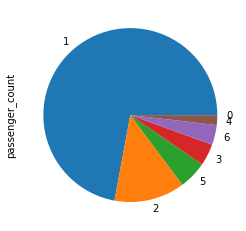

In [330]:
df['passenger_count'].value_counts().plot.pie()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9999 non-null   int64  
 1   trip_distance    9999 non-null   float64
 2   total_amount     9999 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [332]:
mylist = list(df['passenger_count'])

In [333]:
import sys
sys.getsizeof(mylist)

80048

In [334]:
sum([sys.getsizeof(one_int)
for one_int in mylist])

279964

In [335]:
279964 + sys.getsizeof(mylist)

360012

In [336]:
mylist = list(df['total_amount'])

In [337]:
sum([sys.getsizeof(one_f)
for one_f in mylist])

239976

In [338]:
239976 + sys.getsizeof(mylist)

320024

In [340]:
%ls files

airlines.dat  airports.zip	   celebrity_deaths_2016.csv  taxi.csv
airports/     burrito_current.csv  languages.csv	      titanic3.csv


In [341]:
!head files/airlines.dat

1,"Private flight",\N,"-","N/A","","","Y" 
2,"135 Airways",\N,"","GNL","GENERAL","United States","N"
3,"1Time Airline",\N,"1T","RNX","NEXTIME","South Africa","Y"
4,"2 Sqn No 1 Elementary Flying Training School",\N,"","WYT","","United Kingdom","N"
5,"213 Flight Unit",\N,"","TFU","","Russia","N"
6,"223 Flight Unit State Airline",\N,"","CHD","CHKALOVSK-AVIA","Russia","N"
7,"224th Flight Unit",\N,"","TTF","CARGO UNIT","Russia","N"
8,"247 Jet Ltd",\N,"","TWF","CLOUD RUNNER","United Kingdom","N"
9,"3D Aviation",\N,"","SEC","SECUREX","United States","N"
10,"40-Mile Air",\N,"Q5","MLA","MILE-AIR","United States","Y"


In [347]:
df = pd.read_csv('files/airlines.dat',
                header=None,
                usecols=[1, 3, 4, 5, 6],
                names=['name', '2code', '3code', 'formal_name', 'country'])
df.head()

,name,2code,3code,formal_name,country
0,Private flight,-,NaN,NaN,NaN
1,135 Airways,NaN,GNL,GENERAL,United States
2,1Time Airline,1T,RNX,NEXTIME,South Africa
3,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,NaN,United Kingdom
4,213 Flight Unit,NaN,TFU,NaN,Russia


In [348]:
df.describe()

,name,2code,3code,formal_name,country
count,6048,1461,5961,5305,6033
unique,5959,1090,5766,5215,276
top,Star Air,1I,\N,Inc.,United States
freq,5,7,165,20,1080


In [349]:
df.dtypes

name           object
2code          object
3code          object
formal_name    object
country        object
dtype: object

In [350]:
df.dropna().describe()

,name,2code,3code,formal_name,country
count,1114,1114,1114,1114,1114
unique,1109,915,1061,1098,191
top,Comair,SX,\N,Rainbow Air,United States
freq,2,4,45,3,164


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         6048 non-null   object
 1   2code        1461 non-null   object
 2   3code        5961 non-null   object
 3   formal_name  5305 non-null   object
 4   country      6033 non-null   object
dtypes: object(5)
memory usage: 236.4+ KB


In [352]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         6048 non-null   object
 1   2code        1461 non-null   object
 2   3code        5961 non-null   object
 3   formal_name  5305 non-null   object
 4   country      6033 non-null   object
dtypes: object(5)
memory usage: 1.7 MB


In [353]:
236 / 1700

0.1388235294117647

In [355]:
# Pandas provides us with "category" data
# it takes each string, and gives it a numerical value
# it looks like we still have strings... but it's actually using an integer

df['country'] = df['country'].astype('category')

In [356]:
df.head()

,name,2code,3code,formal_name,country
0,Private flight,-,NaN,NaN,NaN
1,135 Airways,NaN,GNL,GENERAL,United States
2,1Time Airline,1T,RNX,NEXTIME,South Africa
3,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,NaN,United Kingdom
4,213 Flight Unit,NaN,TFU,NaN,Russia


In [357]:
df['country']

0                  NaN
1        United States
2         South Africa
3       United Kingdom
4               Russia
             ...      
6043              Cuba
6044         Australia
6045             Spain
6046          Portugal
6047           Germany
Name: country, Length: 6048, dtype: category
Categories (276, object): [' Boonville Stage Line', ' S.A.', 'ACOM', 'ACTIVE AERO', ..., 'Yemen', 'Zambia', 'Zimbabwe', '\N']

In [358]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         6048 non-null   object  
 1   2code        1461 non-null   object  
 2   3code        5961 non-null   object  
 3   formal_name  5305 non-null   object  
 4   country      6033 non-null   category
dtypes: category(1), object(4)
memory usage: 1.4 MB


In [363]:
df = pd.read_csv('files/taxi.csv',
                usecols=['trip_distance', 'passenger_count', 'total_amount'])
df = df[:50]
df

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30
5,1,1.40,10.55
6,1,1.80,16.30
7,4,11.90,73.84
8,1,1.27,15.80
9,1,0.60,6.30


<AxesSubplot:>

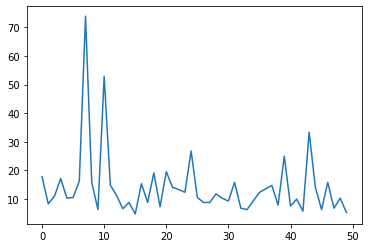

In [364]:
df['total_amount'].plot.line()

<AxesSubplot:>

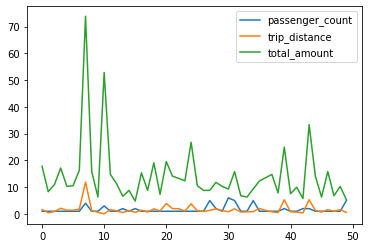

In [365]:
df.plot.line() 

<AxesSubplot:title={'center':'My taxi plot'}>

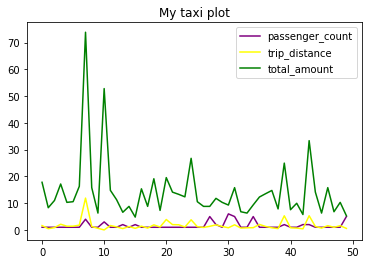

In [368]:
df.plot.line(color=['purple', 'yellow', 'green'], title='My taxi plot') 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

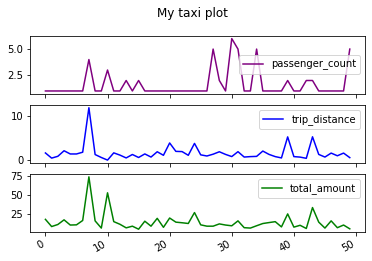

In [370]:
df.plot.line(color=['purple', 'blue', 'green'], 
             title='My taxi plot',
            subplots=True) 

In [374]:
df = pd.read_csv('files/taxi.csv',
                usecols=['trip_distance', 'passenger_count', 'total_amount',
                        'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                        'improvement_surcharge'])
df = df[:20]
df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,1.63,17.0,0.0,0.5,0.00,0.00,0.3,17.80
1,1,0.46,6.5,0.0,0.5,1.00,0.00,0.3,8.30
2,1,0.87,8.0,0.0,0.5,2.20,0.00,0.3,11.00
3,1,2.13,13.5,0.0,0.5,2.86,0.00,0.3,17.16
4,1,1.40,9.5,0.0,0.5,0.00,0.00,0.3,10.30
5,1,1.40,8.0,0.0,0.5,1.75,0.00,0.3,10.55
6,1,1.80,12.5,0.0,0.5,3.00,0.00,0.3,16.30
7,4,11.90,52.5,0.0,0.5,15.00,5.54,0.3,73.84
8,1,1.27,15.0,0.0,0.5,0.00,0.00,0.3,15.80
9,1,0.60,5.0,0.0,0.5,0.50,0.00,0.3,6.30


<AxesSubplot:>

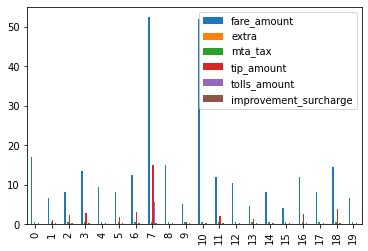

In [377]:
df[['fare_amount', 'extra','mta_tax',
   'tip_amount', 'tolls_amount', 'improvement_surcharge']].plot.bar()

<AxesSubplot:>

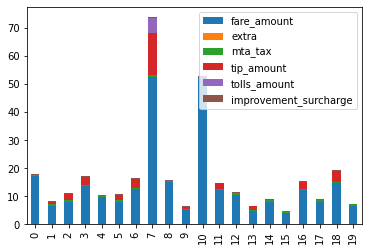

In [378]:
df[['fare_amount', 'extra','mta_tax',
   'tip_amount', 'tolls_amount', 'improvement_surcharge']].plot.bar(stacked=True)

<AxesSubplot:>

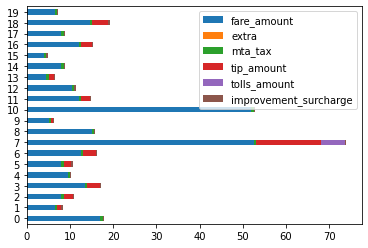

In [379]:
df[['fare_amount', 'extra','mta_tax',
   'tip_amount', 'tolls_amount', 'improvement_surcharge']].plot.barh(stacked=True)

In [380]:
df = DataFrame(np.random.randint(0, 1000, [5,5]),
              index=list('abcde'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,190,71,621,906,981
b,436,151,998,296,378
c,953,845,962,949,278
d,932,268,918,965,126
e,416,15,261,614,107


In [381]:
df['u'] = df['v'] + df['w']

In [382]:
df

,v,w,x,y,z,u
a,190,71,621,906,981,261
b,436,151,998,296,378,587
c,953,845,962,949,278,1798
d,932,268,918,965,126,1200
e,416,15,261,614,107,431


<AxesSubplot:xlabel='u', ylabel='v'>

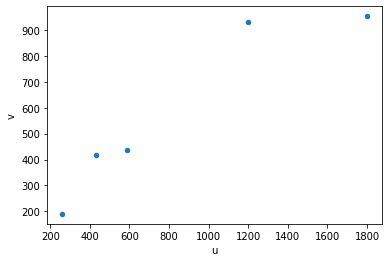

In [383]:
df.plot.scatter(x='u', y='v')

<AxesSubplot:xlabel='u', ylabel='y'>

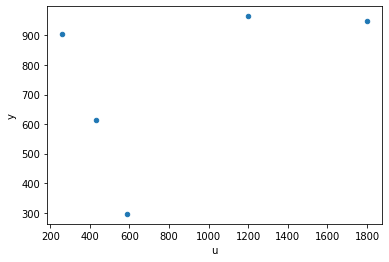

In [384]:
df.plot.scatter(x='u', y='y')